# Домашняя работа №1

In [1]:
import numpy as np
import pylab as pl
import pandas as pd
import warnings
import math
from math import sqrt, acos, degrees

from matplotlib import pyplot as plt
from scipy import linalg
from numpy import linalg as LA

warnings.filterwarnings("ignore")

## Задание 1

Изобразите с помощью matplotlib. Изобразите точку x + 2y + 3z. Найдите угол между векторами x, y и x, z. 

In [2]:
x = np.array([1,1])
y = np.array([2, 0])
z = np.array([0,2])

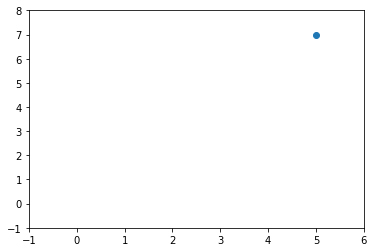

In [3]:
new_dot = x + 2 * y + 3 * z
plt.scatter(new_dot[0], new_dot[1])
plt.ylim([-1, 8])
plt.xlim([-1, 6])
plt.show()

In [4]:
xy = np.array([y[0]-x[0],y[1]-x[1]])
xz = np.array([z[0]-x[0],z[1]-x[1]])
scal = xy[0]*xz[0] + xy[1]*xz[1]
module = sqrt(xy[0]**2 + xy[1]**2) * sqrt(xz[0]**2 + xz[1]**2)

print(degrees(acos(scal/module)))

179.99999879258172


## Задание 2

Загрузите модель человека. Найдите расстояние от правой кисти до позвоночника

In [5]:
ns = ['type', 'x', 'y', 'z']
# read points for joints
dfJointsVertexes = pd.read_csv('joints.txt', sep=' ', names = ns)
axis_sort = 'x' 
df = dfJointsVertexes.sort_values(by=[axis_sort])

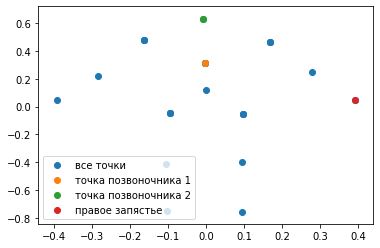

In [6]:
plt.scatter(df.x, df.y)

plt.scatter(df.x[9], df.y[9])
plt.scatter(df.x[11], df.y[11])
plt.scatter(df.x[16], df.y[16])
plt.legend(['все точки', 'точка позвоночника 1','точка позвоночника 2', 'правое запястье'])

0.3945363610739645

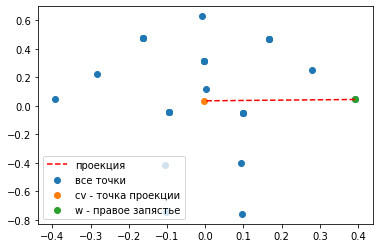

In [7]:
# вектор v - вектор позвоночника (составлен как разность одного вектора из другого)
v = np.array([df.x[11] - df.x[9], df.y[11] - df.y[9]])
# вектор w - вектор правого запястья
w = np.array([df.x[16],df.y[16]])
# строим проекцию данной точки w на вектор v: cv
cv = np.array(df.x[9], df.y[9]) + (np.dot(w,v))/np.dot(v,np.transpose(v))*v

plt.plot([w[0],cv[0]],[w[1],cv[1]],'r--',linewidth=1.5)
plt.scatter(df.x, df.y)
plt.scatter(cv[0], cv[1])
plt.scatter(w[0], w[1])
plt.legend(['проекция', 'все точки', 'cv - точка проекции', 'w - правое запястье'])

linalg.norm(cv - w)

# Задание 3

Найдите собственные значения и собственные вектора матриц (необходимо решение на numpy). Для матрицы 3x3 можно посмотреть на корни характеристического многочлена, посчитанные в numpy.

In [8]:
m1 = np.array([[2, 2],
               [1, 3]])

m2 = np.array([[4, 1, -1],
               [1, 4, -1],
               [-1, -1, 4]])

In [9]:
e_vals, e_vecs = LA.eig(m1)
print('Для матрицы m1')

print('Собственные вектора: \n', e_vecs)
print('Собственные значения: ', e_vals)

Для матрицы m1
Собственные вектора: 
 [[-0.89442719 -0.70710678]
 [ 0.4472136  -0.70710678]]
Собственные значения:  [1. 4.]


In [10]:
e_vals, e_vecs = LA.eig(m2)
print('Для матрицы m2')

print('Собственные вектора: \n', e_vecs)
print('Собственные значения: ', e_vals[:2])

Для матрицы m2
Собственные вектора: 
 [[-0.81649658  0.57735027 -0.27658128]
 [ 0.40824829  0.57735027  0.8035929 ]
 [-0.40824829 -0.57735027  0.52701162]]
Собственные значения:  [3. 6.]
